# Text Analysis and Classification

## Overview
This project implements text classification using various tree-based models and word embeddings. The analysis compares the performance of Decision Trees, Random Forest, and AdaBoost algorithms.

## Data Processing
- Text preprocessing using GloVe word embeddings
- Removal of stopwords and punctuation
- Text vectorization for model input

## Models Implemented & Evaluated

### 1. Decision Trees
- Compared Gini and Entropy criteria
- Cross-validation with different `min_samples_leaf` values
- Evaluated impact of `max_features` parameter

### 2. Random Forest
- Tested both Gini and Entropy criteria
- Cross-validation across different `n_estimators` (10-300)
- Analyzed impact of `min_samples_leaf` (1-50)

### 3. AdaBoost
- Evaluated performance with varying number of estimators
- Tested different learning rates (0.01-2.0)
- Used shallow decision trees as base classifiers

## Model Optimization
- Used 5-fold cross-validation for robust evaluation
- Tracked both training and validation accuracies
- Implemented hyperparameter tuning for each model

## Final Implementation
- Selected Random Forest as the best performing model
- Optimized parameters:
  - n_estimators: 300
  - max_features: 'sqrt'
  - criterion: 'gini'
  - min_samples_leaf: 2
  - bootstrap: False

## Visualization
- Bar charts comparing model performances
- Line plots showing impact of hyperparameters
- Tabulated results for easy comparison

## Output
- Generated predictions for test data
- Saved results in 'labels.csv'

In [15]:
%pip install pandas numpy matplotlib tabulate gdown scikit-learn nltk tabulate gdown

Note: you may need to restart the kernel to use updated packages.


**Utility Functions**

Utility functions to plot the bar chart, and the line chart

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a bar chart for the training and validation accuracy with respect to Gini and Entropy
def plot_accuracy_bar_chart(train_accuracies, val_accuracies):
    plt.figure(figsize=(8, 5))
    bar_width = 0.35
    index = np.arange(2)

    # Plot bars for Gini and Entropy for both Training and Validation Accuracy
    plt.bar(index, [train_accuracies[0], val_accuracies[0]], bar_width, label='Gini', color='cyan')
    plt.bar(index + bar_width, [train_accuracies[1], val_accuracies[1]], bar_width, label='Entropy', color='orange')

    # Add value labels on top of the bars for Gini (cyan)
    for i, v in enumerate([train_accuracies[0], val_accuracies[0]]):
        plt.text(i - 0.1, v + 0.01, f"{v:.2f}", color='black')

    # Add value labels on top of the bars for Entropy (orange)
    for i, v in enumerate([train_accuracies[1], val_accuracies[1]]):
        plt.text(i + bar_width - 0.1, v + 0.01, f"{v:.2f}", color='black')

    # Add labels, title, and legend with padding
    plt.xlabel('Accuracy Type')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy with Respect to Gini and Entropy', pad=20)
    plt.xticks(index + bar_width / 2, ['Training Accuracy', 'Validation Accuracy'])
    plt.ylim(0, 1)
    plt.legend()

    plt.tight_layout()
    plt.show()



# Plot a line chart for accuracy results from 5-fold cross-validation
def plot_cv_results(param_values, train_accuracies, val_accuracies, param_name, title):
    # Convert any None values to strings
    param_values_str = [str(v) if v is None else v for v in param_values]

    # Plot the training and validation accuracy as a function of the hyperparameter
    plt.figure(figsize=(10, 6))
    plt.plot(param_values_str, train_accuracies, label="Training Accuracy", marker='o')
    plt.plot(param_values_str, val_accuracies, label="Validation Accuracy", marker='o')

    # Add labels and title
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()


## Preprocessing the Data
This part preprocesses the data using lemmatization to retain base words in the test and to keep the original meaning of those words.

In [17]:
import os
import gdown

# Define local path for GloVe file
glove_file_path = "glove.6B.100d.txt"

# Check if the file already exists locally
if not os.path.exists(glove_file_path):
    print("GloVe file not found. Downloading from Google Drive...")

    # Google Drive file ID for the GloVe embeddings
    file_id = "1QsPKoMTyODoqTklndJcbUjVdnGQ804H-"
    
    try:
        gdown.download(f"https://drive.google.com/uc?id={file_id}", glove_file_path, quiet=False)
        print("Download completed successfully!")
    except Exception as e:
        print(f"An error occurred while downloading: {e}")
        print("Please download the file manually from Google Drive")
else:
    print("GloVe file already exists locally.")

GloVe file already exists locally.


In [18]:
# Import dependencies
import pandas as pd
import string
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required nltk data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Load the training dataset
df = pd.read_csv('24_train_1.csv')

# Load GloVe word embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            embedding = np.array(values[1:], dtype='float32')
            embeddings_index[word] = embedding
    return embeddings_index

# Download the GloVe embeddings
glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')

# Define the preprocessing function for word embeddings
def preprocess_with_embeddings(text, embedding_dict, dim=100):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

    # Get embeddings for each token, if available
    embeddings = [embedding_dict[word] for word in tokens if word in embedding_dict]

    # If there are embeddings, return the mean of them to form a sentence embedding
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(dim)  # Return a zero vector if no embeddings are found

# Apply preprocessing with word embeddings
df['Processed_Text_Embeddings'] = df['Text'].apply(lambda x: preprocess_with_embeddings(x, glove_embeddings))


df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ArticleId,Text,Category,Processed_Text_Embeddings
0,1429,sfa awaits report over mikoliunas the scottish...,sport,"[0.06420795, -0.010859786, 0.228332, -0.445875..."
1,1896,parmalat to return to stockmarket parmalat th...,business,"[0.26465207, 0.06277873, 0.1742507, 0.00230591..."
2,1633,edu blasts arsenal arsenal s brazilian midfiel...,sport,"[0.12231237, 0.08992957, 0.2044165, -0.2400586..."
3,2178,henman decides to quit davis cup tim henman ha...,sport,"[-0.057508428, 0.1620013, 0.39009807, -0.20961..."
4,194,french suitor holds lse meeting european stock...,business,"[0.28008497, 0.058318987, 0.11564614, 0.054153..."


## Decision Tree Model


### Calculating the training and validation accuracies for "Gini" and "Entropy" criteria

Randomly select 80% data instances as training, and the remaining 20% data instances as validation.

Criterion: gini
Training Accuracy: 1.0
Validation Accuracy: 0.855

Criterion: entropy
Training Accuracy: 1.0
Validation Accuracy: 0.84



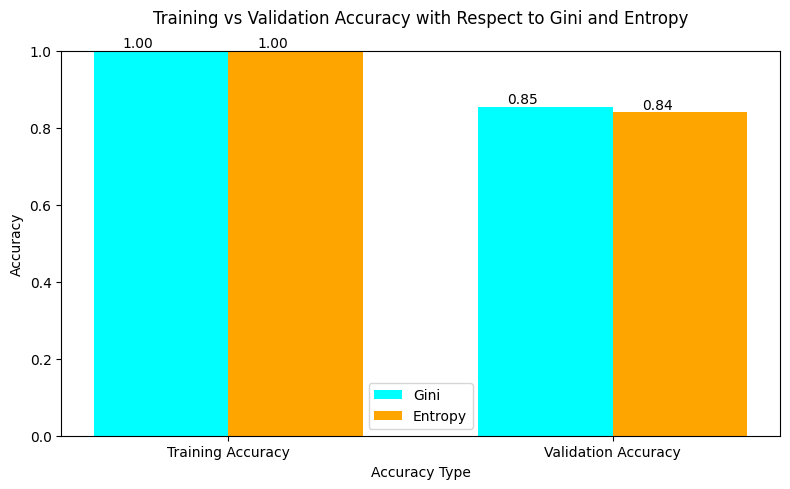

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Stack the embeddings into a 2D array (from a list of arrays)
X = np.stack(df['Processed_Text_Embeddings'].values)

# Labels (target variable)
Y = df['Category']

# Splitting the training data (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize lists to store results
criteria = ['gini', 'entropy']
train_accuracies = []
val_accuracies = []

# Train and evaluate decision trees with different criteria
for criterion in criteria:
    # Training the decision tree model
    dt_clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt_clf.fit(X_train, Y_train)

    # Calculate training and validation accuracy
    train_acc = accuracy_score(Y_train, dt_clf.predict(X_train))
    val_acc = accuracy_score(Y_val, dt_clf.predict(X_val))

    # Store results
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Criterion: {criterion}")
    print(f"Training Accuracy: {train_acc}")
    print(f"Validation Accuracy: {val_acc}")
    print()

# Plot the bar chart
plot_accuracy_bar_chart(train_accuracies, val_accuracies)

### Decision tree evaluation using 5-fold cross-validation with respect to `min_samples_leaf`

+----+--------------------+---------------------+-----------------------+----------------+------------------+
|    |   min_samples_leaf |   Training Accuracy |   Validation Accuracy |   Training Std |   Validation Std |
+====+====================+=====================+=======================+================+==================+
|  0 |                  1 |             0.8525  |                 0.725 |      0.0239139 |        0.0316228 |
+----+--------------------+---------------------+-----------------------+----------------+------------------+
|  1 |                  5 |             0.84125 |                 0.72  |      0.0134629 |        0.0913783 |
+----+--------------------+---------------------+-----------------------+----------------+------------------+
|  2 |                 10 |             0.8225  |                 0.715 |      0.0161051 |        0.0604152 |
+----+--------------------+---------------------+-----------------------+----------------+------------------+
|  3 |    

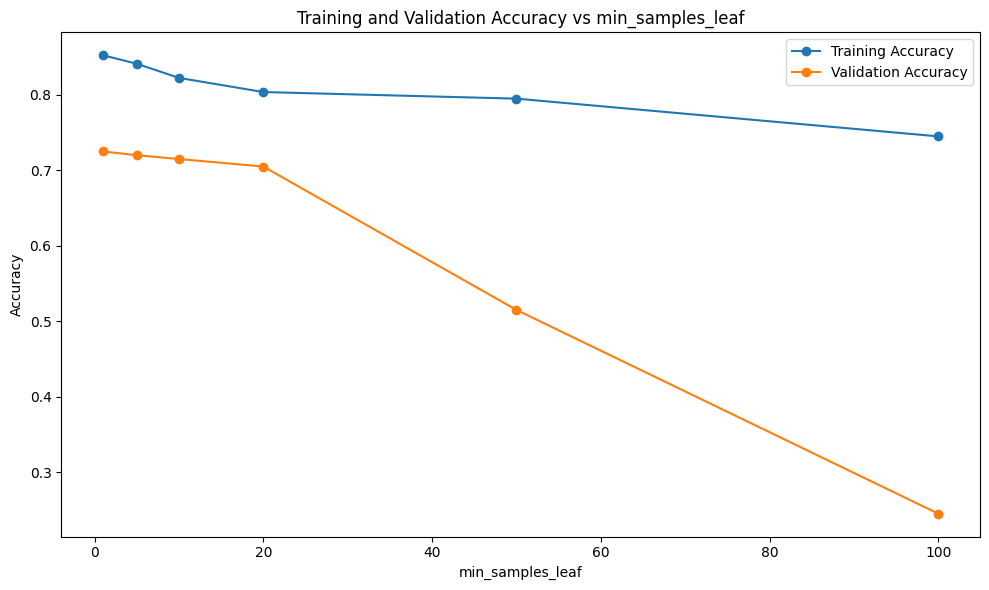

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from tabulate import tabulate

# Defining the range of min_samples_leaf values to test
min_samples_leaf_values = [1, 5, 10, 20, 50, 100]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []

# Perform 5-fold cross-validation for each value of min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, random_state=42)

    # Perform 5-fold cross-validation and capture training scores
    train_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(clf, X_val, Y_val, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each min_samples_leaf value
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))
    train_std.append(np.std(train_scores))
    val_std.append(np.std(val_scores))


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Pandas DataFrame to append the results
results_df = pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_values,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Std': train_std,
    'Validation Std': val_std
})

# Display the results in tabulation format
print(tabulate(results_df, headers='keys', tablefmt='grid'))


# Plotting the results in a line chart
plot_cv_results(min_samples_leaf_values, train_accuracies, val_accuracies, param_name='min_samples_leaf', title='Training and Validation Accuracy vs min_samples_leaf')

### Decision tree evaluation using 5-fold cross-validation with respect to `max_features`

+----+----------------+---------------------+-----------------------+----------------+------------------+
|    | max_features   |   Training Accuracy |   Validation Accuracy |   Training Std |   Validation Std |
+====+================+=====================+=======================+================+==================+
|  0 | sqrt           |             0.8175  |                 0.75  |      0.0286138 |        0.0223607 |
+----+----------------+---------------------+-----------------------+----------------+------------------+
|  1 | log2           |             0.805   |                 0.72  |      0.0160078 |        0.113358  |
+----+----------------+---------------------+-----------------------+----------------+------------------+
|  2 |                |             0.8525  |                 0.725 |      0.0239139 |        0.0316228 |
+----+----------------+---------------------+-----------------------+----------------+------------------+
|  3 | 0.1            |             0.8175  | 

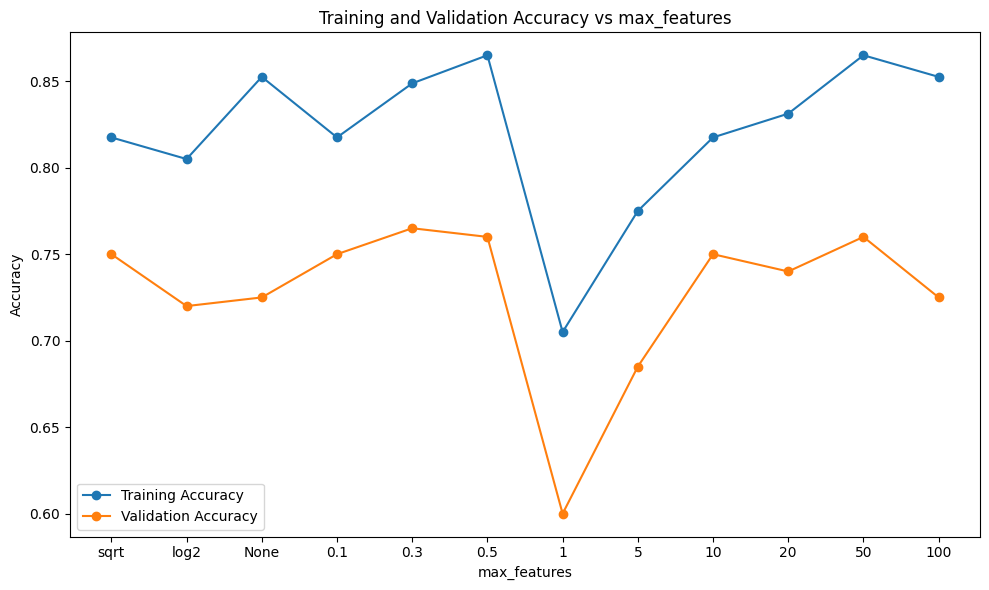

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from tabulate import tabulate

# Defining the range of max_features values to test
max_features_values = ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 1, 5, 10, 20, 50, 100]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []

# Perform 5-fold cross-validation for each value of max_features
for max_features in max_features_values:
    dt_clf = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=42)

    # Perform 5-fold cross-validation and capture training scores
    train_scores = cross_val_score(dt_clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(dt_clf, X_val, Y_val, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each max_features value
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))
    train_std.append(np.std(train_scores))
    val_std.append(np.std(val_scores))


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Pandas DataFrame to append the results
results_df = pd.DataFrame({
    'max_features': max_features_values,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Std': train_std,
    'Validation Std': val_std
})

# Display the results in tabulation format
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Plotting the results in a line chart
plot_cv_results(max_features_values, train_accuracies, val_accuracies, param_name='max_features', title='Training and Validation Accuracy vs max_features')

## Random Forest Model


### Calculating the training and validation accuracies for "Gini" and "Entropy" criteria

Criterion: gini
Training Accuracy: 1.0
Validation Accuracy: 0.955

Criterion: entropy
Training Accuracy: 1.0
Validation Accuracy: 0.965



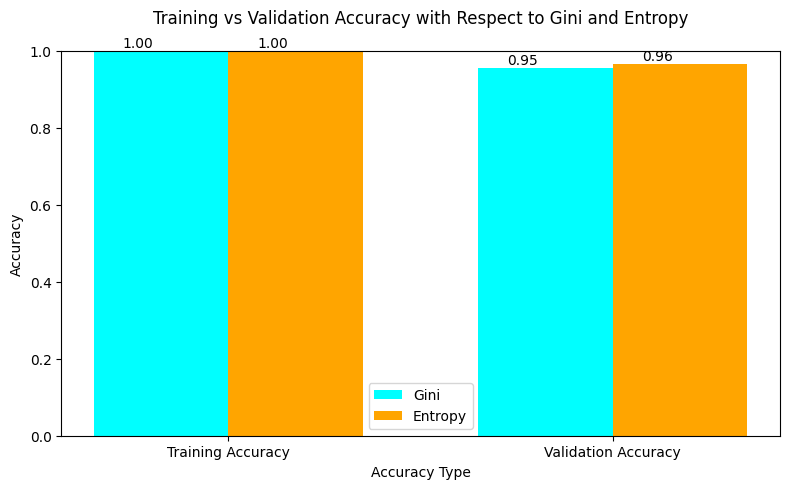

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df['Processed_Text_Embeddings'] contains sentence embeddings as feature vectors
# Stack the embeddings into a 2D array (from a list of arrays)
X = np.stack(df['Processed_Text_Embeddings'].values)



# Labels (target variable)
Y = df['Category']

# Splitting the training data (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


# Initialize lists to store results
criteria = ['gini', 'entropy']
train_accuracies = []
val_accuracies = []

# Train and evaluate decision trees with different criteria
for criterion in criteria:
    # Training the decision tree model
    rf_clf = RandomForestClassifier(criterion=criterion, random_state=42)
    rf_clf.fit(X_train, Y_train)

    # Calculate training and validation accuracy
    train_acc = accuracy_score(Y_train, rf_clf.predict(X_train))
    val_acc = accuracy_score(Y_val, rf_clf.predict(X_val))

    # Store results
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Criterion: {criterion}")
    print(f"Training Accuracy: {train_acc}")
    print(f"Validation Accuracy: {val_acc}")
    print()

# Plot the bar chart
plot_accuracy_bar_chart(train_accuracies, val_accuracies)

### Random Forest evaluation using 5-fold cross-validation with respect to `n_estimators`

+----+----------------+---------------------+-----------------------+----------------+------------------+
|    |   n_estimators |   Training Accuracy |   Validation Accuracy |   Training Std |   Validation Std |
+====+================+=====================+=======================+================+==================+
|  0 |             10 |             0.9325  |                 0.885 |     0.021433   |        0.0339116 |
+----+----------------+---------------------+-----------------------+----------------+------------------+
|  1 |             20 |             0.94875 |                 0.915 |     0.00918559 |        0.0254951 |
+----+----------------+---------------------+-----------------------+----------------+------------------+
|  2 |             30 |             0.95125 |                 0.92  |     0.00612372 |        0.0430116 |
+----+----------------+---------------------+-----------------------+----------------+------------------+
|  3 |             50 |             0.9475  | 

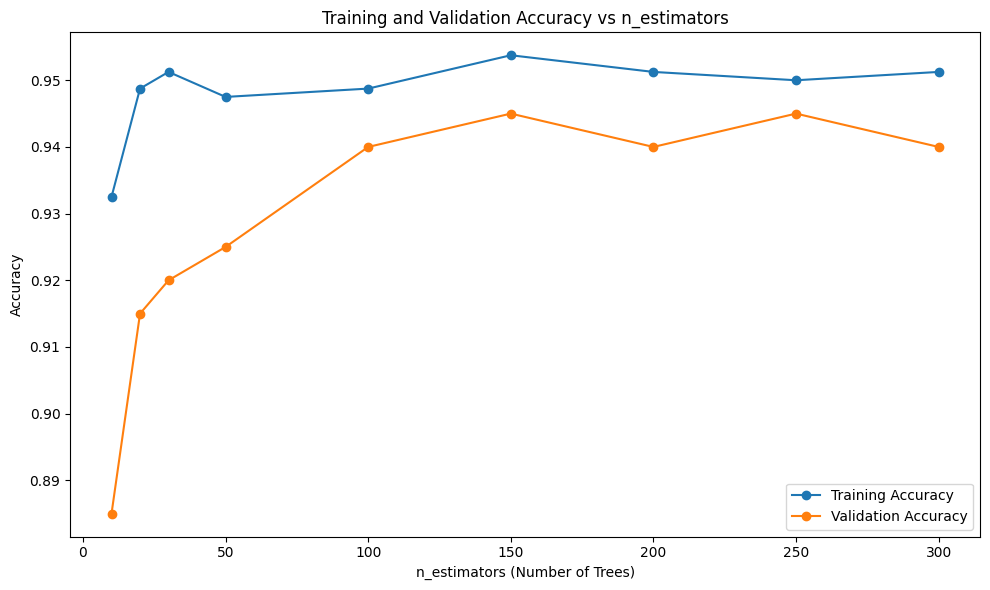

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from tabulate import tabulate

# Defining the range of n_estimators values to test (number of trees)
n_estimators_values = [10, 20, 30, 50, 100, 150, 200, 250, 300]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []

# Perform 5-fold cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', random_state=42)

    # Perform cross-validation and capture training scores
    train_scores = cross_val_score(rf_clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(rf_clf, X_val, Y_val, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each n_estimators value
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))
    train_std.append(np.std(train_scores))
    val_std.append(np.std(val_scores))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Pandas DataFrame to append the results
results_df = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Std': train_std,
    'Validation Std': val_std
})

# Display the results in tabulation format
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Plotting the results in a line chart
plot_cv_results(n_estimators_values, train_accuracies, val_accuracies, param_name='n_estimators (Number of Trees)', title='Training and Validation Accuracy vs n_estimators')

### Random Forest evaluation using 5-fold cross-validation with respect to `min_samples_leaf`

+----+--------------------+---------------------+-----------------------+----------------+------------------+
|    |   min_samples_leaf |   Training Accuracy |   Validation Accuracy |   Training Std |   Validation Std |
+====+====================+=====================+=======================+================+==================+
|  0 |                  1 |             0.94875 |                 0.94  |     0.0025     |        0.043589  |
+----+--------------------+---------------------+-----------------------+----------------+------------------+
|  1 |                  2 |             0.94625 |                 0.935 |     0.00306186 |        0.0406202 |
+----+--------------------+---------------------+-----------------------+----------------+------------------+
|  2 |                  3 |             0.94625 |                 0.935 |     0.005      |        0.0339116 |
+----+--------------------+---------------------+-----------------------+----------------+------------------+
|  3 |    

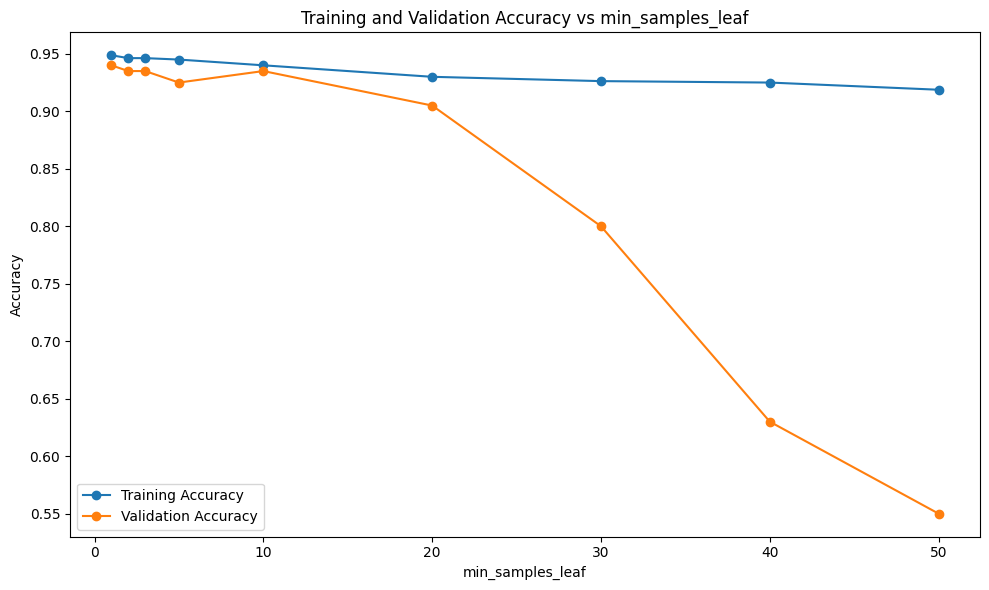

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of min_samples_leaf values to test
min_samples_leaf_values = [1, 2, 3, 5, 10, 20, 30, 40, 50]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []

# Perform 5-fold cross-validation for each value of min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    rf_clf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, criterion='gini', random_state=42)

    # Perform cross-validation and capture training scores
    train_scores = cross_val_score(rf_clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(rf_clf, X_val, Y_val, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each min_samples_leaf value
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))
    train_std.append(np.std(train_scores))
    val_std.append(np.std(val_scores))


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Pandas DataFrame to append the results
results_df = pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_values,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Std': train_std,
    'Validation Std': val_std
})

# Display the results in tabulation format
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Use the reusable plot function
plot_cv_results(min_samples_leaf_values, train_accuracies, val_accuracies, param_name='min_samples_leaf', title='Training and Validation Accuracy vs min_samples_leaf')

## Testing Boosting Trees (AdaBoost)


### Random Forest evaluation using 5-fold cross-validation with respect to `n_estimators`

+----+----------------+---------------------+----------------+-----------------------+------------------+
|    |   n_estimators |   Training Accuracy |   Training Std |   Validation Accuracy |   Validation Std |
+====+================+=====================+================+=======================+==================+
|  0 |             10 |             0.78    |     0.0338655  |                 0.75  |        0.0353553 |
+----+----------------+---------------------+----------------+-----------------------+------------------+
|  1 |             50 |             0.90625 |     0.0197642  |                 0.865 |        0.0254951 |
+----+----------------+---------------------+----------------+-----------------------+------------------+
|  2 |            100 |             0.93125 |     0.0167705  |                 0.88  |        0.01      |
+----+----------------+---------------------+----------------+-----------------------+------------------+
|  3 |            150 |             0.93375 | 

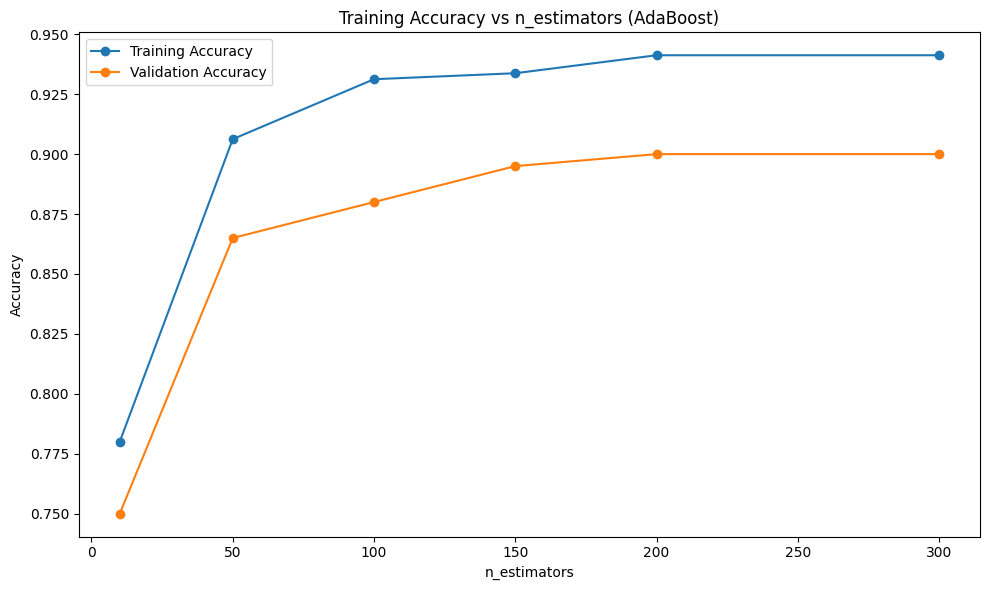

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Stack the embeddings into a 2D array
X = np.stack(df['Processed_Text_Embeddings'].values)

# Labels (target variable)
Y = df['Category']

# Splitting the training data (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

base_clf = DecisionTreeClassifier(max_depth=1)  # Shallow decision tree for AdaBoost

# Define the range of n_estimators values to test (number of weak learners)
n_estimators_values = [10, 50, 100, 150, 200, 300]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []

# Perform 5-fold cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    # Initialize AdaBoost classifier with the base decision tree and varying n_estimators
    ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=n_estimators, algorithm='SAMME', random_state=42)

    # Perform cross-validation and capture training scores
    train_scores = cross_val_score(ada_clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(ada_clf, X_val, Y_val, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each n_estimators value
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))
    train_std.append(np.std(train_scores))
    val_std.append(np.std(val_scores))

# Create a DataFrame to store the results
results = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'Training Accuracy': train_accuracies,
    'Training Std': train_std,
    'Validation Accuracy': val_accuracies,
    'Validation Std': val_std
})

# Display the results using tabulate
print(tabulate(results, headers='keys', tablefmt='grid'))



# Call the plotting function to visualize the results
plot_cv_results(n_estimators_values, train_accuracies, val_accuracies, param_name='n_estimators', title='Training Accuracy vs n_estimators (AdaBoost)')

### Random Forest evaluation using 5-fold cross-validation with respect to `learning_rate`

+-----------------+---------------------+-----------------------+----------------+------------------+
|   learning_rate |   Training Accuracy |   Validation Accuracy |   Training Std |   Validation Std |
+=================+=====================+=======================+================+==================+
|            0.01 |             0.405   |                 0.4   |      0.0107529 |        0.0273861 |
+-----------------+---------------------+-----------------------+----------------+------------------+
|            0.1  |             0.7875  |                 0.75  |      0.0397256 |        0.0790569 |
+-----------------+---------------------+-----------------------+----------------+------------------+
|            0.5  |             0.90125 |                 0.835 |      0.0127475 |        0.0339116 |
+-----------------+---------------------+-----------------------+----------------+------------------+
|            1    |             0.90625 |                 0.865 |      0.0197642 |

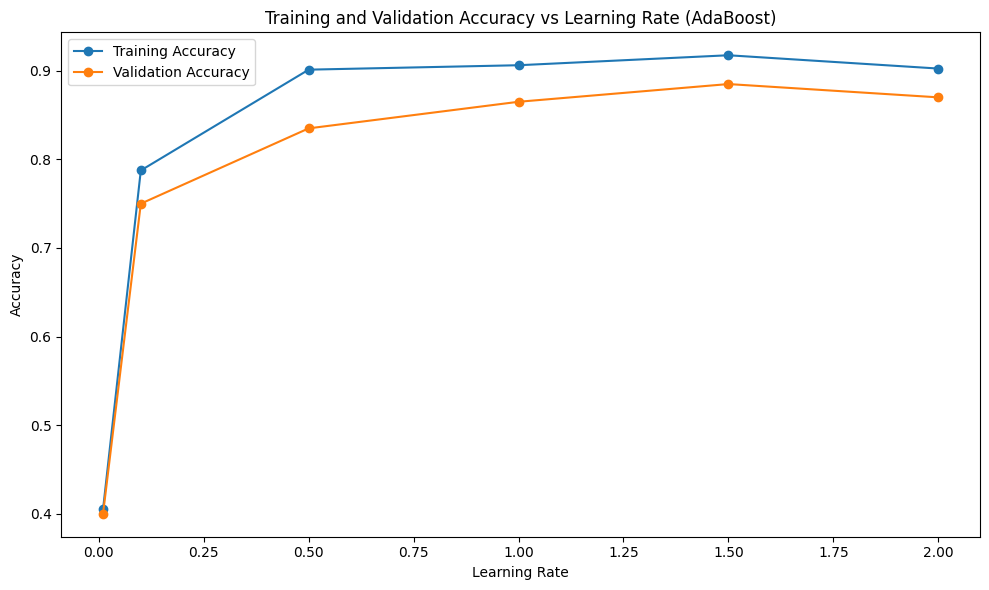

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define the range of learning rate values to test
learning_rate_values = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []

# Perform 5-fold cross-validation for each value of learning_rate
for learning_rate in learning_rate_values:
    # Redefine the base classifier with constant min_samples_leaf
    base_clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=2)

    # Initialize AdaBoost classifier with the base decision tree and varying learning_rate
    ada_clf = AdaBoostClassifier(estimator=base_clf, learning_rate=learning_rate, algorithm='SAMME', random_state=42)

    # Perform cross-validation on the training data
    train_scores = cross_val_score(ada_clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(ada_clf, X_val, Y_val, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each learning_rate value
    train_accuracies.append(np.mean(train_scores))
    val_accuracies.append(np.mean(val_scores))
    train_std.append(np.std(train_scores))
    val_std.append(np.std(val_scores))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the results using tabulate
results = {
    'learning_rate': learning_rate_values,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Std': train_std,
    'Validation Std': val_std
}

# Convert results to a tabulated format and print
print(tabulate(results, headers="keys", tablefmt="grid"))

# Call the plot function to visualize the results
plot_cv_results(learning_rate_values, train_accuracies, val_accuracies, 'Learning Rate', 'Training and Validation Accuracy vs Learning Rate (AdaBoost)')

## Final Model Inference

Based on the results for previous tests, I found that the Random Forest model is the best.

### Fine-tuning the hyperparameters for the best model (Random Forest)

Based on the 5-fodl cross validation, the result shows that the `n_estimators = 150` and `min_samples_leaf = 1` to be the best. However, here I try different parameters to find the best possible parameters for the highest accuracy.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Stack the embeddings into a 2D array (from a list of arrays)
X = np.stack(df['Processed_Text_Embeddings'].values)


# Labels (target variable)
Y = df['Category']

# Splitting the training data (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from tabulate import tabulate

# Defining parameters to test
n_estimators = 300
max_features = 'sqrt'
criterion = 'gini'
max_depth = None
min_samples_split = 2
min_samples_leaf = 2
bootstrap = False

# Perform cross-validation
rf_clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_features=max_features,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

# Initialize lists to store results
train_accuracies = []
val_accuracies = []
train_std = []
val_std = []


# Perform cross-validation and capture training and validation scores
train_scores = cross_val_score(rf_clf, X_train, Y_train, cv=5, scoring='accuracy')
val_scores = cross_val_score(rf_clf, X_val, Y_val, cv=5, scoring='accuracy')

# Store the mean accuracy and standard deviation
train_accuracies.append(np.mean(train_scores))
val_accuracies.append(np.mean(val_scores))
train_std.append(np.std(train_scores))
val_std.append(np.std(val_scores))

# Pandas DataFrame to store and display the results
results_df = pd.DataFrame({
    'n_estimators': [n_estimators],
    'max_features': [max_features],
    'criterion': [criterion],
    'max_depth': [max_depth],
    'min_samples_split': [min_samples_split],
    'min_samples_leaf': [min_samples_leaf],
    'bootstrap': [bootstrap],
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Std': train_std,
    'Validation Std': val_std
})

# Display the results in tabulation format
print(tabulate(results_df, headers='keys', tablefmt='grid'))



+----+----------------+----------------+-------------+-------------+---------------------+--------------------+-------------+---------------------+-----------------------+----------------+------------------+
|    |   n_estimators | max_features   | criterion   | max_depth   |   min_samples_split |   min_samples_leaf | bootstrap   |   Training Accuracy |   Validation Accuracy |   Training Std |   Validation Std |
+====+================+================+=============+=============+=====================+====================+=============+=====================+=======================+================+==================+
|  0 |            300 | sqrt           | gini        |             |                   2 |                  2 | False       |             0.95375 |                 0.945 |     0.00637377 |             0.04 |
+----+----------------+----------------+-------------+-------------+---------------------+--------------------+-------------+---------------------+---------------------

### Running the best model on the testing data
Predicting the labels for the test data using the best model.

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the GloVe embeddings file
glove_file_path = "glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_file_path)

# Load the test dataset & preprocess using word embeddings
test_df = pd.read_csv('news-test-1.csv')
test_df['Processed_Text_Embeddings'] = test_df['Text'].apply(lambda x: preprocess_with_embeddings(x, glove_embeddings))

# Convert the processed text embeddings into a NumPy array for model input
X_test = np.array(test_df['Processed_Text_Embeddings'].tolist())

# Load your full training data and preprocess using word embeddings
train_df = pd.read_csv('24_train_1.csv')  # Replace with the actual path to your training dataset
train_df['Processed_Text_Embeddings'] = train_df['Text'].apply(lambda x: preprocess_with_embeddings(x, glove_embeddings))

# Convert the processed text embeddings into a NumPy array for model input
X_train_full = np.array(train_df['Processed_Text_Embeddings'].tolist())
Y_train_full = train_df['Category']

# Defining parameters for RandomForestClassifier
n_estimators = 300
max_features = 'sqrt'
criterion = 'gini'
max_depth = None
min_samples_split = 2
min_samples_leaf = 2
bootstrap = False

# Define the RandomForestClassifier with the best parameters
best_rf_clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_features=max_features,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    bootstrap=bootstrap,
    random_state=42
)

# Train the RandomForest model with the word embeddings
best_rf_clf.fit(X_train_full, Y_train_full)

# Use the trained model to predict the labels for the test data
predictions = best_rf_clf.predict(X_test)

# Create a DataFrame with ArticleId and the predicted Category
output_df = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': predictions
})

# Save the predictions to a CSV file (without header)
output_df.to_csv('labels.csv', index=False, header=False)

print("Predictions saved to labels.csv.")


Predictions saved to labels.csv.
